# Project Data Analysis


*Dataset from [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data).*  

First, we define the Business Questions:  
- What are the majority characteristics (age, education, etc.) of customers in this case?  
- Which products are frequently purchased by customers?  
- What is the relationship between income and spending on products?  
- How effective is the marketing campaign promotion in this case?  
- How effective is the point of sale in this case?  
- What are the patterns of purchases made with discounts, and what can we conclude about customer behavior from these discount-based purchase patterns?  

Let's get started!

## Customer Behavior Analysis


### Import Library, Load Dataset, etc.

First, let's import all the necessary libraries.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

After importing the necessary libraries, we read the dataset and store it in the variable `df1`.

In [6]:
df1 = pd.read_csv('marketing_campaign.csv', sep='\t')

**Attributes**  

***People***  
- **ID**: Unique identifier for the customer  
- **Year_Birth**: Customer's year of birth  
- **Education**: Customer's education level  
- **Marital_Status**: Customer's marital status  
- **Income**: Customer's annual household income  
- **Kidhome**: Number of children in the customer's household  
- **Teenhome**: Number of teenagers in the customer's household  
- **Dt_Customer**: Date when the customer registered with the company  
- **Recency**: Number of days since the customer's last purchase  
- **Complain**: 1 if the customer has filed a complaint in the last 2 years, 0 if not  

***Products***  
- **MntWines**: Amount spent on wine in the last 2 years  
- **MntFruits**: Amount spent on fruits in the last 2 years  
- **MntMeatProducts**: Amount spent on meat products in the last 2 years  
- **MntFishProducts**: Amount spent on fish products in the last 2 years  
- **MntSweetProducts**: Amount spent on sweet products in the last 2 years  
- **MntGoldProds**: Amount spent on gold products in the last 2 years  

***Promotion***  
- **NumDealsPurchases**: Number of purchases made with a discount  
- **AcceptedCmp1**: 1 if the customer accepted the offer in the first campaign, 0 if not  
- **AcceptedCmp2**: 1 if the customer accepted the offer in the second campaign, 0 if not  
- **AcceptedCmp3**: 1 if the customer accepted the offer in the third campaign, 0 if not  
- **AcceptedCmp4**: 1 if the customer accepted the offer in the fourth campaign, 0 if not  
- **AcceptedCmp5**: 1 if the customer accepted the offer in the fifth campaign, 0 if not  
- **Response**: 1 if the customer accepted the offer in the last campaign, 0 if not  

***Place***  
- **NumWebPurchases**: Number of purchases made through the company's website  
- **NumCatalogPurchases**: Number of purchases made through the catalog  
- **NumStorePurchases**: Number of purchases made directly in the store  
- **NumWebVisitsMonth**: Number of visits to the company's website in the last month  

In [7]:
with pd.option_context('display.max_columns', None):
  display(df1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


Then, we display information about our dataset, including the number of rows and columns, data types, non-null counts, etc.

In [8]:
df1.info(

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Handle Missing Values

Next, we check the number of missing values in each column using the `isnull().sum()` function. This helps us identify which parts of the dataset have missing values so we can handle them accordingly.

In [9]:
df1.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

After checking, we see that only the `Income` column has 24 missing values. Let's handle this by first separating the data into two parts:  

- `df_customer_missing_income`: Contains customers with missing `Income` values.  
- `df_customer_without_missing`: Contains customers with non-missing `Income` values.  

This separation allows us to analyze the data and decide whether to impute the missing values or remove the rows with missing `Income`.

In [10]:
df_customer_missing_income = df1[df1.Income.isna()]
df_customer_without_missing = df1[df1.Income.notna()]

As we can see after displaying the data, the `Income` column in `df_customer_missing_income` contains only NaN values, meaning all its values are missing since we have already separated them.

In [11]:
with pd.option_context('display.max_columns', None):
  display(df_customer_missing_income)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


This time, we compare the spending patterns between `df_customer_missing_income` and `df_customer_without_missing`. Based on our analysis, customers in `df_customer_missing_income` exhibit different shopping behavior compared to those in `df_customer_without_missing`, with an overall lower average spending.

In [12]:
with pd.option_context('display.max_columns', None):
  display(df_customer_missing_income.describe())

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,24.000000,24.000000,0.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0,24.000000,24.000000,24.000000,24.0,24.0,24.0,24.0,24.000000
mean,5943.625000,1967.458333,NaN,0.666667,0.583333,58.041667,197.208333,21.333333,162.708333,27.166667,30.208333,49.250000,2.458333,4.041667,1.833333,4.791667,5.083333,0.0,0.125000,0.041667,0.083333,0.0,0.0,3.0,11.0,0.041667
std,3028.349268,12.021644,NaN,0.637022,0.583592,29.492046,242.479758,38.310705,339.420411,41.281290,58.488928,79.599678,2.653614,5.303642,2.478896,3.175712,2.586195,0.0,0.337832,0.204124,0.282330,0.0,0.0,0.0,0.0,0.204124
min,1295.000000,1943.000000,NaN,0.000000,0.000000,4.000000,5.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.0,11.0,0.000000
25%,3063.250000,1957.750000,NaN,0.000000,0.000000,35.500000,22.000000,1.000000,14.500000,2.000000,1.500000,6.750000,1.000000,1.000000,0.000000,3.000000,3.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.0,11.0,0.000000
50%,5526.500000,1969.500000,NaN,1.000000,1.000000,62.000000,76.000000,3.500000,35.000000,8.000000,4.000000,17.500000,1.500000,2.500000,1.000000,4.000000,6.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.0,11.0,0.000000
75%,8597.750000,1974.250000,NaN,1.000000,1.000000,82.250000,286.000000,24.250000,177.000000,40.750000,31.750000,55.000000,3.000000,5.250000,3.000000,7.000000,7.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.0,11.0,0.000000
max,10629.000000,1989.000000,NaN,2.000000,2.000000,96.000000,861.000000,138.000000,1607.000000,164.000000,263.000000,362.000000,12.000000,27.000000,10.000000,12.000000,9.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,3.0,11.0,1.000000


In [13]:
with pd.option_context('display.max_columns', None):
  display(df_customer_without_missing.describe())

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Next, we compare the promotional engagement between the two groups.**

This time, when comparing the promotion aspect, we observe that customers with missing `Income` values mostly rejected the campaign offers, with only a few (one or two, or slightly more) accepting them. On the other hand, customers with available `Income` values had a higher acceptance rate for campaign offers, although there were still many rejections. However, the rejection rate was not as overwhelmingly high as in the missing `Income` group, where nearly all customers refused the offers.

In [14]:
campaign_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']

for campaign in campaign_columns:
  print(df_customer_missing_income[campaign].value_counts())

AcceptedCmp3
0    24
Name: count, dtype: int64
AcceptedCmp4
0    21
1     3
Name: count, dtype: int64
AcceptedCmp5
0    23
1     1
Name: count, dtype: int64
AcceptedCmp1
0    22
1     2
Name: count, dtype: int64
AcceptedCmp2
0    24
Name: count, dtype: int64
Complain
0    24
Name: count, dtype: int64
Response
0    23
1     1
Name: count, dtype: int64


In [15]:
for campaign in campaign_columns:
  print(df_customer_without_missing[campaign].value_counts())

AcceptedCmp3
0    2053
1     163
Name: count, dtype: int64
AcceptedCmp4
0    2052
1     164
Name: count, dtype: int64
AcceptedCmp5
0    2054
1     162
Name: count, dtype: int64
AcceptedCmp1
0    2074
1     142
Name: count, dtype: int64
AcceptedCmp2
0    2186
1      30
Name: count, dtype: int64
Complain
0    2195
1      21
Name: count, dtype: int64
Response
0    1883
1     333
Name: count, dtype: int64


Now, let's calculate the percentage of missing values in the `Income` column compared to the total dataset.

In [16]:
len(df_customer_missing_income) / len(df1) * 100

1.0714285714285714

After conducting further analysis, we conclude:  

- The number of missing values is only 24 out of 2,240 rows (1.07% of the data).  
- Customers with missing `Income` values exhibit different shopping patterns, with lower average spending compared to `df_customer_without_missing`.  
- The campaign acceptance data shows a distinct pattern. Customers with missing `Income` values mostly rejected promotional offers, with only a few accepting them. Meanwhile, those with non-missing `Income` values had a higher acceptance rate, though still with some rejections.  

I choose to handle the missing values using **median imputation** because:  

- I want to retain all data for analysis without losing information, especially from customers with lower purchasing power.  
- Keeping all rows allows for deeper analysis of the entire dataset.  
- Although removing 1.07% of the data is a valid option, I prefer to keep the dataset complete to preserve valuable information from other columns (e.g., spending on `MntWines`, `MntMeatProducts`, etc.).

Next, we copy the dataset `df1` into `df2`. After that, we fill the null values in the `Income` column with the median value of that column using the `fillna()` function.

In [17]:
df2 = df1.copy()
df2['Income'].fillna(df2['Income'].median(), inplace=True)

After that, we check the number of missing values in each column using the `isnull().sum()` function to verify if we have successfully handled them. If everything is correct, we should see that there are no more missing values in the dataset.

In [18]:
df2.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### Fixing Inconsistencies

Next, we check the data format using `df2.info()` to ensure all columns have the correct data types. If we find any inconsistencies, we will handle them accordingly.

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

This time, we analyze the columns `Year_Birth`, `Dt_Customer`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `AcceptedCmp1`, `AcceptedCmp2`, `Complain`, and `Response` to determine if we need to change their data types.  

- **`Year_Birth`**: Since it only contains the birth year without a full date (day and month), we **keep it as an integer**.  
- **`Dt_Customer`**: This column represents the customer’s registration date, so we **convert it to datetime format**.  
- **Binary Columns (`AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `AcceptedCmp1`, `AcceptedCmp2`, `Complain`, `Response`)**: These are categorical binary variables (0 or 1), so we may **convert them to boolean (`True`/`False`) for better readability**.  

Before making these changes, let's first check their current data types.

We will check the unique values in the campaign columns using the `unique()` function.

In [20]:
campaign_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']

for campaign in campaign_columns:
  print(campaign, df2[campaign].unique())

AcceptedCmp3 [0 1]
AcceptedCmp4 [0 1]
AcceptedCmp5 [0 1]
AcceptedCmp1 [0 1]
AcceptedCmp2 [0 1]
Complain [0 1]
Response [1 0]


Since the unique values are only 0 and 1, we will convert them to boolean data type using `astype(bool)`.

In [21]:
df2[campaign_columns] = df2[campaign_columns].astype(bool)

Next, we will change the data type of `Dt_Customer`. I initially tried using the `ISO 8601` format, but since our dataset follows the `%Y-%m-%d` format (year first), we will use `format='%d-%m-%Y'` in our code instead.

In [22]:
df2['Dt_Customer'] = pd.to_datetime(df2['Dt_Customer'], format='%d-%m-%Y')

Next, we will check whether we have successfully changed the data formats using `df2.info()`.

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

As we can see, `Dt_Customer` is now in the expected format, and the promotion columns, which were originally 0 and 1, have been successfully converted to boolean.

In [24]:
with pd.option_context('display.max_columns', None):
  display(df2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,False,False,False,False,False,False,3,11,True
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,False,False,False,False,False,False,3,11,False
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,False,False,False,False,False,False,3,11,False
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,False,False,False,False,False,False,3,11,False
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,False,False,False,False,False,False,3,11,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,False,False,False,False,False,False,3,11,False
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,False,False,False,True,False,False,3,11,False
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,False,True,False,False,False,False,3,11,False
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,False,False,False,False,False,False,3,11,False


### Handle Anomalies and Outliers

Next, we will handle anomalies in our dataset.

At first, I didn’t realize there were anomalies, but after data visualization, I noticed anomalies in `Year_Birth` and `Income`. Therefore, we will handle values that don’t make sense, such as birth years that are too old (before 1920) since it’s unlikely that someone is over 100 years old, or too young (after 2010).  
We will check for anomalies in the `Year_Birth` column.

In [25]:
anomali_year_birth = df2[(df2['Year_Birth'] < 1920) | (df2['Year_Birth'] > 2010)]
anomali_year_birth

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,False,False,False,False,False,True,3,11,False
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,4,False,False,False,False,False,False,3,11,False
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,False,False,True,False,False,False,3,11,False


We will create a new variable, `df3`, by removing rows that contain anomalies in the `Year_Birth` column. We will use the `drop()` method with the parameter `anomali_year_birth.index`, which refers to the rows containing anomalies that we identified earlier.

In [26]:
df3 = df2.drop(anomali_year_birth.index)

Next, we will detect outliers in the `Income` column. Based on my research and a reference from [Outliers](https://ilmudatapy.com/menemukan-outlier-dengan-python/), I found that identifying and handling outliers is important because they can make our data biased and not representative of the actual phenomenon. However, detecting outliers in a large dataset can be challenging. 
One of the common methods to determine outliers is the ***IQR Score (Interquartile Range Score)***, which I have chosen to use.

First, we need to find the first quartile (Q1) and third quartile (Q3) of the data. We can use `quantile()` from NumPy as shown below. Then, we will display the outliers to verify whether they exist. If there are outliers, we will proceed with the next steps.

In [27]:
q1 = df3['Income'].quantile(0.25)
q3 = df3['Income'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df3[(df3['Income'] < lower_bound) | (df3['Income'] > upper_bound)]
outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,False,False,False,False,False,False,3,11,False
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,False,False,False,False,False,False,3,11,False
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,False,False,False,False,False,False,3,11,False
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,False,False,False,False,False,False,3,11,False
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,False,False,False,False,False,False,3,11,False
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,1,False,False,False,False,False,False,3,11,False
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0,False,False,False,False,False,False,3,11,False
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,False,False,False,False,False,False,3,11,False


We will create a new variable, `df3`, by removing the rows that contain outliers in the `Income` column. We will use the `drop()` method with the parameter `outliers.index`, which refers to the rows containing the outliers that we identified earlier.

In [28]:
df4 = df3.drop(outliers.index)

Since the index of our dataset is now unorganized due to the removed rows, we will reset the index using `reset_index(drop=True)`. This ensures that the index remains sequential without keeping the old index as a new column.

In [29]:
df4 = df4.reset_index(drop=True)

Great! Now that the index is properly reset and sequential from 0 to 2228, our dataset is clean and ready for further analysis. What's the next step? 😊

In [30]:
with pd.option_context('display.max_columns', None):
  display(df4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,False,False,False,False,False,False,3,11,True
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,False,False,False,False,False,False,3,11,False
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,False,False,False,False,False,False,3,11,False
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,False,False,False,False,False,False,3,11,False
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,False,False,False,False,False,False,3,11,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,False,False,False,False,False,False,3,11,False
2225,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,False,False,False,True,False,False,3,11,False
2226,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,False,True,False,False,False,False,3,11,False
2227,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,False,False,False,False,False,False,3,11,False


## Exploratory Data Analysis (EDA)

After cleaning the dataset, addressing anomalies/outliers, etc., since we are not focusing on model creation, our goal now is to analyze and visualize the data to answer the questions we previously mentioned.

### First Question (Year Birth Distribution and Education Distribution)

In [31]:
df4.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

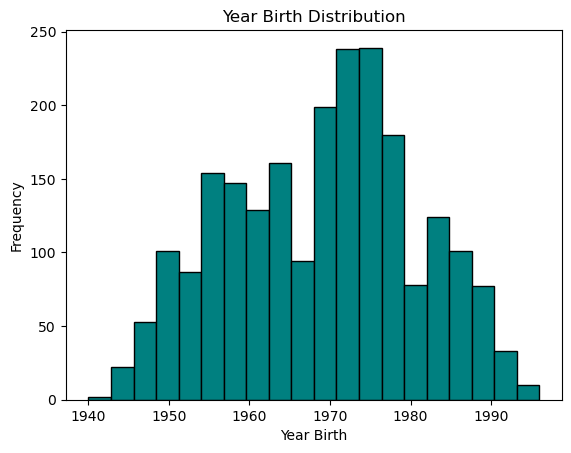

In [32]:
plt.hist(df4['Year_Birth'], bins=20, color='teal', edgecolor='black')
plt.title('Year Birth Distribution')
plt.xlabel('Year Birth')
plt.ylabel('Frequency')
plt.show()

# year_count = df4['Year_Birth'].value_counts().sort_index()
# year_count

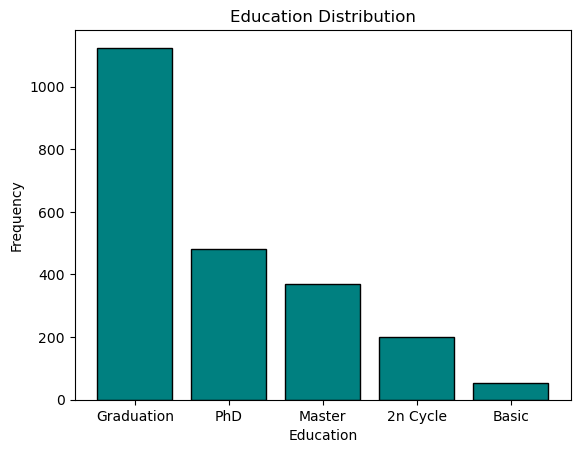

In [33]:
education_count = df4['Education'].value_counts()

plt.bar(education_count.index, education_count.values, color='teal', edgecolor='black')
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

After visualizing the data for the first question:  
> What are the majority characteristics (age, education, etc.) of customers in this case?  

We found that, based on the Year Birth Distribution, most customers were born between 1970 and 1990. This indicates that the majority of our customers fall within the age group of 30s to 50s.  

For education, the Education Distribution results show that most customers have a Graduation degree, followed by those with a PhD.

### Second Question (Total Spending by Product Category)

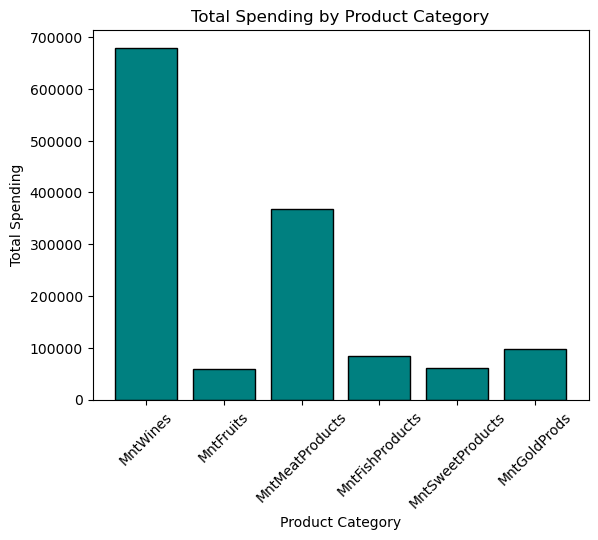

In [34]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spending = df4[spending_columns].sum()

plt.bar(total_spending.index, total_spending.values, color='teal', edgecolor='black')
plt.title('Total Spending by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

After visualizing the data for the second question:  
> Which products are frequently purchased by customers?  

We found that, based on the **Total Spending by Product Category**, the most significant spending is on **Wine**, with a total of nearly **700,000**, followed by **Meat**, with a total exceeding **300,000**.

### Third Question (Income Distribution and Spending)

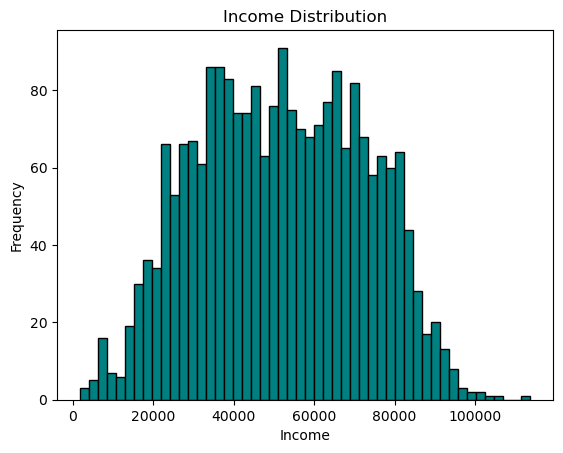

In [35]:
plt.hist(df4['Income'], bins=50, color='teal', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Kita bisa lihat disini bahwa, mayoritas Customer yang memiliki income rangenya sekitar 20000 - 80000 atau bisa kita sebut mayoritas Customer memiliki income di level menengah.

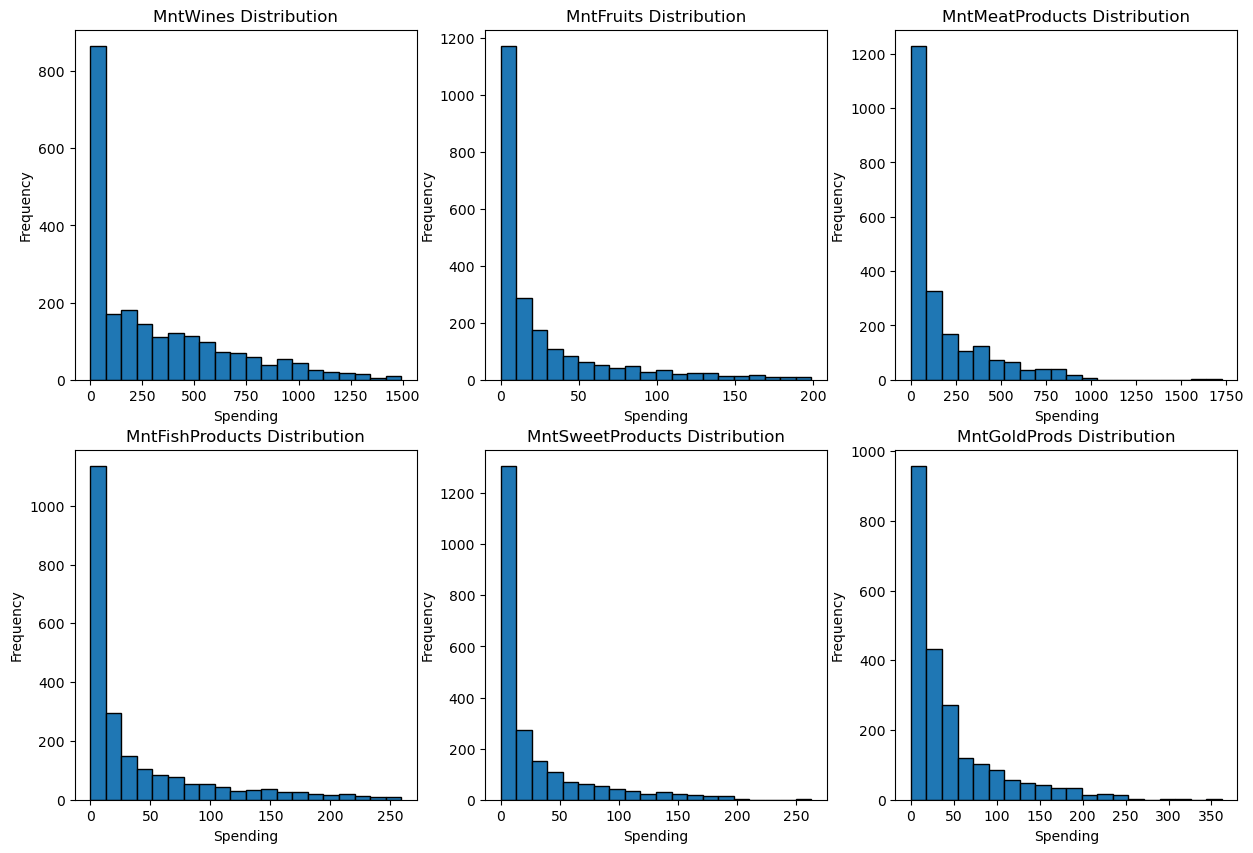

In [36]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, columns in enumerate(spending_columns):
  ax = axes.flat[i]
  ax.hist(df4[columns], bins=20, edgecolor='black')
  ax.set_title(f'{columns} Distribution')
  ax.set_xlabel('Spending')
  ax.set_ylabel('Frequency')

plt.show()

We can see each expenditure category in our dataset. From the diagram, we can conclude that:

**MntWines**:  
- The spending distribution is skewed towards lower values.  
- Some values indicate high spending on wine.  
- More than 800 people did not spend anything on wine.  

**MntFruits**:  
- Most spending on fruits is very low, sometimes even close to zero.  
- Not many customers have high expenditures in this category.  
- Almost 1,200 people did not spend anything on fruits.  

**MntMeatProducts**:  
- The pattern is somewhat similar to wine, but spending distribution is more concentrated on lower values.  
- Some high expenditures exist, but they are not very significant in number.  
- More than 1,200 people did not spend anything on meat.  

**MntFishProducts**:  
- Similar to fruits, most spending values are low.  
- A few cases show high spending.  
- More than 1,000 people did not spend anything on fish.  

**MntSweetProducts**:  
- Spending on sweets tends to be low, close to zero for the majority of customers.  
- Some moderate spending levels can still be observed.  

**MntGoldProds**:  
- The distribution is similar to other categories: most customers have low spending.  
- A few cases show high spending in this category.

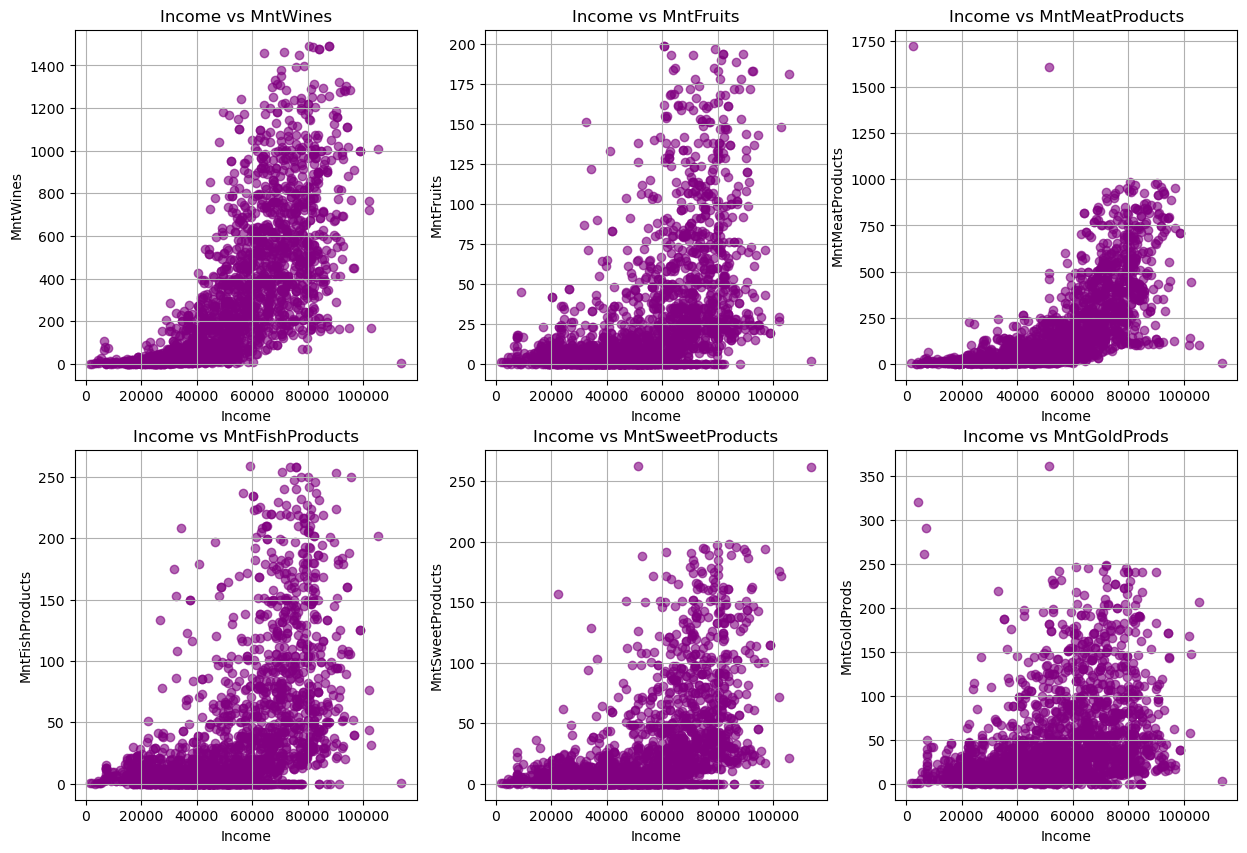

In [37]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, column in enumerate(spending_columns):
  ax = axes.flat[i]
  ax.scatter(df4['Income'], df4[column], alpha=0.6, color='purple')
  ax.set_title(f'Income vs {column}')
  ax.set_xlabel('Income')
  ax.set_ylabel(column)
  ax.grid(True)

plt.show()


After visualizing the data to examine the relationship between income and product expenditure, we will answer our third question:

> What is the relationship between income and product expenditure?

**MntWines**:  
1. There is a trend of increasing wine expenditure as income rises.  
2. People with higher incomes tend to spend significantly on wine.  

**MntFruits**:  
1. Most fruit expenditures are low, although some higher-income individuals show slightly higher spending.  

**MntMeatProducts**:  
1. The pattern is somewhat similar to wine, where spending increases as income rises.  
2. Meat consumption is more evenly distributed compared to other categories. This means that meat is consumed not only by high-income individuals but also by middle- and low-income groups. Its distribution is broader than that of products like wine.  

**MntFishProducts**:  
1. Lower spending is more common, but some high-income individuals show higher expenditures.  

**MntSweetProducts**:  
1. Spending on sweets remains low, with little variation across different income levels.  

**MntGoldProds**:  
1. Some individuals, especially those with higher incomes, spend significantly on gold products.

Selanjutnya, kita akan mencoba menjumlahkan semua pengeluaran lalu hubungkan dengan Income

Pertama-tama, kita buat kolom baru `Total_Spending` di DataFrame `df4`. Pada kolom baru tersebut merupakan hasil penjumlahan semua yang ada di `spending_columns` seperti `MntWines`, `MntFruits`, dll.. Tujuan kita untuk hitung semua pengeluaran Customer pada semua kategori Produk

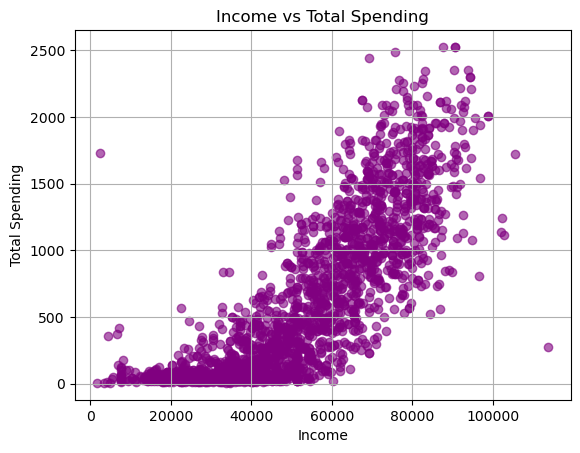

In [38]:
df4['Total_Spending'] = df4[spending_columns].sum(axis=1)
plt.scatter(df4['Income'], df4['Total_Spending'], alpha=0.6, color='purple')
plt.title('Income vs Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.grid(True)

plt.show()

What we can see here is that most customers with high incomes tend to have higher expenditures compared to those with lower incomes. However, there are some customers with middle to high income levels who have relatively low spending. This could indicate a preference for saving or not shopping frequently.

### Fourth Question (Promotion)

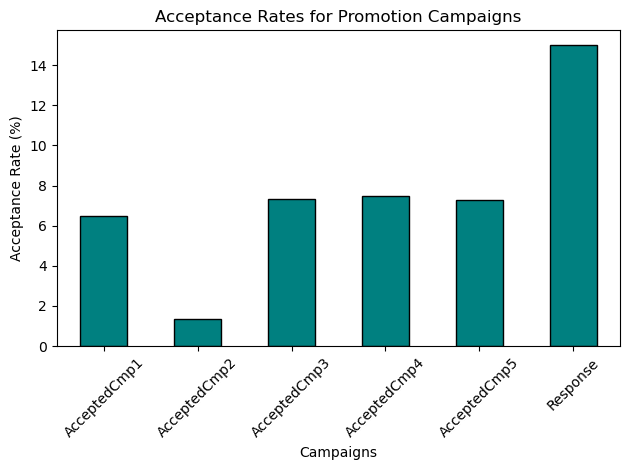

AcceptedCmp1     6.460296
AcceptedCmp2     1.345895
AcceptedCmp3     7.312696
AcceptedCmp4     7.492149
AcceptedCmp5     7.267833
Response        14.984298
Name: Acceptance Rate (%), dtype: float64

In [39]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_data = df4[campaign_columns]
acceptance_rates = campaign_data.mean() * 100

acceptance_rates.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Acceptance Rates for Promotion Campaigns')
plt.xlabel('Campaigns')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
acceptance_rates.name = 'Acceptance Rate (%)'
acceptance_rates

After we attempted to visualize the data to analyze the promotion campaigns, we can now answer the fourth question.

Let's compare the number of accepted campaigns:
- **AcceptedCmp1**: The first campaign was accepted by many customers.
- **AcceptedCmp2**: This campaign had the lowest acceptance rate compared to the others.
- **AcceptedCmp3, AcceptedCmp4, AcceptedCmp5**: The acceptance rates were fairly similar.
- **Response**: The final campaign (Response) showed the highest effectiveness.

Now, let's answer the fourth question:

> How effective were the marketing promotion campaigns in this case?

From the campaign promotion visualization, we can see that the final campaign (Response) was the most effective, with the highest acceptance rate at **14.98%**, compared to the other campaigns, which ranged between **6.46% and 7.49%**, while the least effective campaign had an acceptance rate of only **1.34%**. 

This result suggests that the final campaign had the best strategy, possibly due to factors like a more attractive offer, better communication methods, or perfect timing. Moving forward, the approach used in the final campaign should be replicated in future campaigns, while the least effective campaigns—especially the second one—should be evaluated further to understand and improve their weaknesses.

### Fifth Question (Place of Purchase)

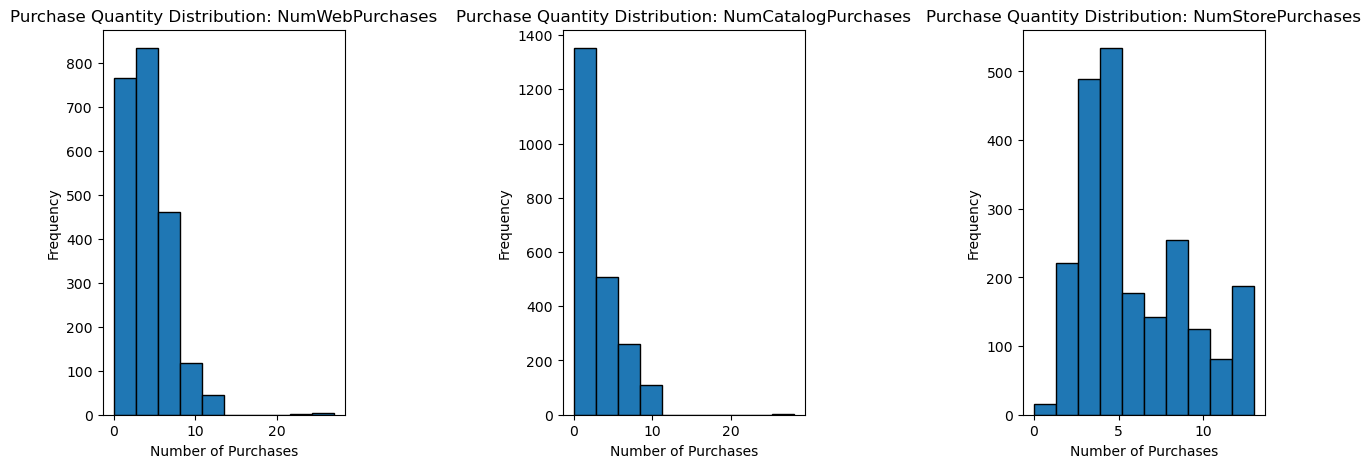

In [40]:
purchase_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, column in enumerate(purchase_columns):
  ax = axes.flat[i]
  ax.hist(df4[column], bins=10,  edgecolor='black')
  ax.set_title(f'Purchase Quantity Distribution: {column}')
  ax.set_xlabel('Number of Purchases')
  ax.set_ylabel('Frequency')
plt.subplots_adjust(wspace=0.9)
plt.show()

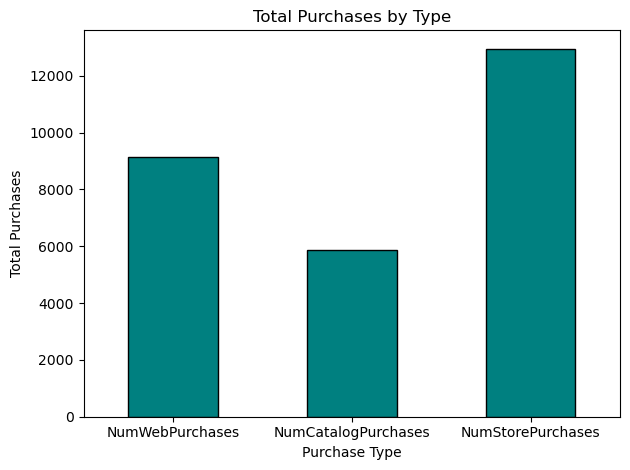

NumWebPurchases         9139
NumCatalogPurchases     5877
NumStorePurchases      12956
Name: Total Purchases, dtype: int64

In [41]:
purchase_sum = df4[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

purchase_sum.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Total Purchases by Type')
plt.ylabel('Total Purchases')
plt.xlabel('Purchase Type')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()
purchase_sum.name= 'Total Purchases'
purchase_sum

We can see here that in-store purchases (`NumStorePurchases`) have the highest total and are the most common. This is followed by purchases made through the company's website (`NumWebPurchases`), which rank second. Lastly, purchases made using catalogs (`NumCatalogPurchases`) are the least frequent. This indicates that direct interaction and in-store purchases are more popular than online or catalog shopping.

### Sixth Question (Purchases and Discounts)

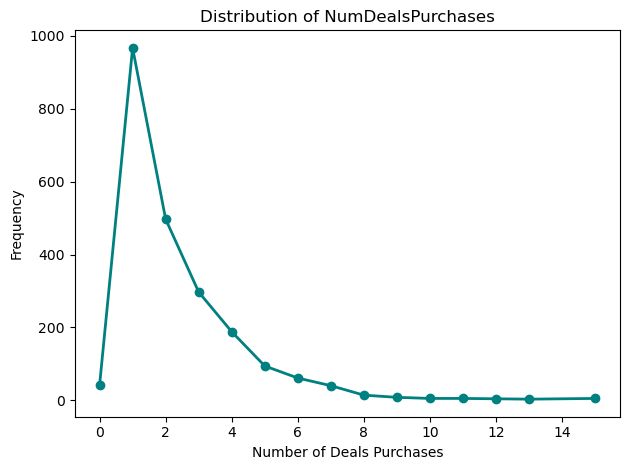

In [42]:
num_deals_counts = df4['NumDealsPurchases'].value_counts().sort_index()
x = num_deals_counts.index
y = num_deals_counts.values

plt.plot(x, y, marker='o', color='teal', linewidth=2)
plt.title("Distribution of NumDealsPurchases")
plt.xlabel("Number of Deals Purchases")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

After visualizing the data to analyze purchases with discounts, let's answer our sixth question:

> What is the pattern of purchases made with discounts, and what can we conclude about Customer behavior from this pattern?

- We can see that the distribution of `NumDealsPurchases` shows that most Customers make discounted purchases only 1 to 3 times within 2 years. The majority of Customers do not frequently take advantage of discounts, but they do not completely avoid them either; they use them occasionally.  
- Only a few Customers utilize discounts more than 5 times. This indicates that discounts are not the main incentive for most Customers.  
- From this distribution, we can conclude that Customers tend to use discounts moderately rather than excessively. The group of Customers who frequently take advantage of discounts can be considered a segment highly sensitive to price.  
- These findings can help shape a promotional strategy where discounts should be targeted at Customers who have already shown high purchasing behavior.

## Conclusion

Based on the analysis:  

1. **Majority of Customer Characteristics**  
   - Most customers were born between **1960 and 1990**, meaning they are **30 to 50 years old**.  
   - The majority of customers have **a bachelor's degree (Graduation)**.  

2. **Frequently Purchased Products**  
   - The most frequently purchased product is **Wine**, with a total spending of nearly **700,000**.  
   - The second highest spending is on **Meat Products**, with a total exceeding **30,000**.  

3. **Income and Spending Relationship**  
   - **Higher-income customers tend to spend more** on certain products.  

4. **Effectiveness of Marketing Campaigns**  
   - The **most successful campaign** was the **latest one**, with a **14.98% acceptance rate**.  
   - This indicates that **the final campaign had an improved strategy**, possibly due to **better offers, communication methods, or timing**.  
   - The successful campaign should be **replicated** for future marketing efforts, while **less effective campaigns**, especially the second one, should be **evaluated further to identify and improve weaknesses**.  

5. **Effectiveness of Sales Channels**  
   - **In-store purchases (NumStorePurchases) had the highest number of transactions**, with **12,956 purchases**.  
   - **Company website purchases (NumWebPurchases) ranked second**, with **9,193 purchases**.  
   - This shows that **in-store sales are more effective than online or catalog sales**.  

6. **Discount Purchase Patterns**  
   - Most customers **only used discounts 1 to 3 times within 2 years**.  
   - Very few customers used discounts more than 5 times, suggesting that **discounts are not the main incentive for most customers**.  
   - Discount strategies should be **focused on customers who already exhibit high purchasing behavior**.  

By understanding these patterns, marketing and sales strategies can be more targeted to improve promotional effectiveness and optimize revenue.